In [35]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import latex
from ast import literal_eval
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [36]:
d1 = pd.read_csv("../results/results_combined_1.csv", index_col=0)
d2 = pd.read_csv("../results/results_combined_4.csv", index_col=0)
d1

,dataset,algorithm,config,runtime_x,percent_changes_detected_x,f1_detected_cps_at_x,precision_x,recall_x,actual_cps,detected_cps,detected_cps_at,runtime_y,percent_changes_detected_y,f1_detected_cps_at_y,precision_y,recall_y,mean_until_detection
0,Gas,MMDEW,$\alpha = 1e-16$,66.651318,140.0,0.666667,0.571429,0.80,"[1833, 4398, 6334, 9343, 10984]",[160693804425899027554196209234116260252220299...,"[2239, 3783, 6720, 8640, 8947, 9642, 11873]",65.956897,140.0,0.666667,0.571429,0.8,495.00
1,Gas,MMDEW,$\alpha = 1e-16$,66.651318,140.0,0.666667,0.571429,0.80,"[1833, 4398, 6334, 9343, 10984]",[160693804425899027554196209234116260252220299...,"[2239, 3783, 6720, 8640, 8947, 9642, 11873]",65.022981,140.0,0.666667,0.571429,0.8,495.00
2,Gas,MMDEW,$\alpha = 1e-16$,66.651318,140.0,0.666667,0.571429,0.80,"[1833, 4398, 6334, 9343, 10984]",[160693804425899027554196209234116260252220299...,"[2239, 3783, 6720, 8640, 8947, 9642, 11873]",62.031916,140.0,0.666667,0.571429,0.8,495.00
3,Gas,MMDEW,$\alpha = 1e-16$,66.651318,140.0,0.666667,0.571429,0.80,"[1833, 4398, 6334, 9343, 10984]",[160693804425899027554196209234116260252220299...,"[2239, 3783, 6720, 8640, 8947, 9642, 11873]",61.280416,140.0,0.666667,0.571429,0.8,495.00
4,Gas,MMDEW,$\alpha = 1e-16$,66.651318,140.0,0.666667,0.571429,0.80,"[1833, 4398, 6334, 9343, 10984]",[160693804425899027554196209234116260252220299...,"[2239, 3783, 6720, 8640, 8947, 9642, 11873]",69.504152,140.0,0.666667,0.571429,0.8,495.00
5,Gas,MMDEW,$\alpha = 1e-16$,66.651318,140.0,0.666667,0.571429,0.80,"[1833, 4398, 6334, 9343, 10984]",[160693804425899027554196209234116260252220299...,"[2239, 3783, 6720, 8640, 8947, 9642, 11873]",65.025886,140.0,0.666667,0.571429,0.8,495.00
6,Gas,MMDEW,$\alpha = 1e-16$,66.651318,140.0,0.666667,0.571429,0.80,"[1833, 4398, 6334, 9343, 10984]",[160693804425899027554196209234116260252220299...,"[2239, 3783, 6720, 8640, 8947, 9642, 11873]",71.284188,140.0,0.666667,0.571429,0.8,495.00
7,Gas,MMDEW,$\alpha = 1e-16$,66.651318,140.0,0.666667,0.571429,0.80,"[1833, 4398, 6334, 9343, 10984]",[160693804425899027554196209234116260252220299...,"[2239, 3783, 6720, 8640, 8947, 9642, 11873]",69.302530,140.0,0.666667,0.571429,0.8,495.00
8,Gas,MMDEW,$\alpha = 1e-16$,66.651318,140.0,0.666667,0.571429,0.80,"[1833, 4398, 6334, 9343, 10984]",[160693804425899027554196209234116260252220299...,"[2239, 3783, 6720, 8640, 8947, 9642, 11873]",71.250413,140.0,0.666667,0.571429,0.8,495.00
9,Gas,MMDEW,$\alpha = 1e-16$,66.651318,140.0,0.666667,0.571429,0.80,"[1833, 4398, 6334, 9343, 10984]",[160693804425899027554196209234116260252220299...,"[2239, 3783, 6720, 8640, 8947, 9642, 11873]",65.853799,140.0,0.666667,0.571429,0.8,495.00


In [37]:
d1[d1["dataset"] == "Traf"].actual_cps.unique()
d1

,dataset,algorithm,config,runtime_x,percent_changes_detected_x,f1_detected_cps_at_x,precision_x,recall_x,actual_cps,detected_cps,detected_cps_at,runtime_y,percent_changes_detected_y,f1_detected_cps_at_y,precision_y,recall_y,mean_until_detection
0,Gas,MMDEW,$\alpha = 1e-16$,66.651318,140.0,0.666667,0.571429,0.80,"[1833, 4398, 6334, 9343, 10984]",[160693804425899027554196209234116260252220299...,"[2239, 3783, 6720, 8640, 8947, 9642, 11873]",65.956897,140.0,0.666667,0.571429,0.8,495.00
1,Gas,MMDEW,$\alpha = 1e-16$,66.651318,140.0,0.666667,0.571429,0.80,"[1833, 4398, 6334, 9343, 10984]",[160693804425899027554196209234116260252220299...,"[2239, 3783, 6720, 8640, 8947, 9642, 11873]",65.022981,140.0,0.666667,0.571429,0.8,495.00
2,Gas,MMDEW,$\alpha = 1e-16$,66.651318,140.0,0.666667,0.571429,0.80,"[1833, 4398, 6334, 9343, 10984]",[160693804425899027554196209234116260252220299...,"[2239, 3783, 6720, 8640, 8947, 9642, 11873]",62.031916,140.0,0.666667,0.571429,0.8,495.00
3,Gas,MMDEW,$\alpha = 1e-16$,66.651318,140.0,0.666667,0.571429,0.80,"[1833, 4398, 6334, 9343, 10984]",[160693804425899027554196209234116260252220299...,"[2239, 3783, 6720, 8640, 8947, 9642, 11873]",61.280416,140.0,0.666667,0.571429,0.8,495.00
4,Gas,MMDEW,$\alpha = 1e-16$,66.651318,140.0,0.666667,0.571429,0.80,"[1833, 4398, 6334, 9343, 10984]",[160693804425899027554196209234116260252220299...,"[2239, 3783, 6720, 8640, 8947, 9642, 11873]",69.504152,140.0,0.666667,0.571429,0.8,495.00
5,Gas,MMDEW,$\alpha = 1e-16$,66.651318,140.0,0.666667,0.571429,0.80,"[1833, 4398, 6334, 9343, 10984]",[160693804425899027554196209234116260252220299...,"[2239, 3783, 6720, 8640, 8947, 9642, 11873]",65.025886,140.0,0.666667,0.571429,0.8,495.00
6,Gas,MMDEW,$\alpha = 1e-16$,66.651318,140.0,0.666667,0.571429,0.80,"[1833, 4398, 6334, 9343, 10984]",[160693804425899027554196209234116260252220299...,"[2239, 3783, 6720, 8640, 8947, 9642, 11873]",71.284188,140.0,0.666667,0.571429,0.8,495.00
7,Gas,MMDEW,$\alpha = 1e-16$,66.651318,140.0,0.666667,0.571429,0.80,"[1833, 4398, 6334, 9343, 10984]",[160693804425899027554196209234116260252220299...,"[2239, 3783, 6720, 8640, 8947, 9642, 11873]",69.302530,140.0,0.666667,0.571429,0.8,495.00
8,Gas,MMDEW,$\alpha = 1e-16$,66.651318,140.0,0.666667,0.571429,0.80,"[1833, 4398, 6334, 9343, 10984]",[160693804425899027554196209234116260252220299...,"[2239, 3783, 6720, 8640, 8947, 9642, 11873]",71.250413,140.0,0.666667,0.571429,0.8,495.00
9,Gas,MMDEW,$\alpha = 1e-16$,66.651318,140.0,0.666667,0.571429,0.80,"[1833, 4398, 6334, 9343, 10984]",[160693804425899027554196209234116260252220299...,"[2239, 3783, 6720, 8640, 8947, 9642, 11873]",65.853799,140.0,0.666667,0.571429,0.8,495.00


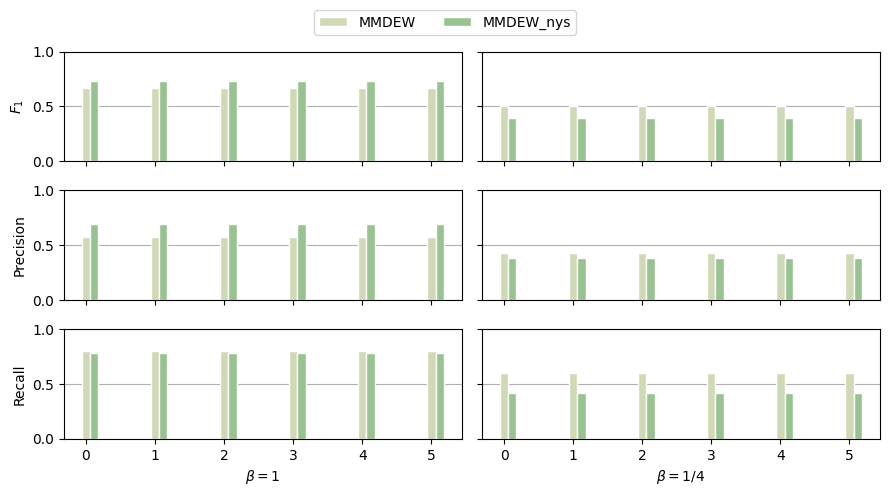

In [38]:
fig, ((ax11,ax12), (ax21, ax22), (ax31, ax32)) = plt.subplots(3,2,figsize=(9,4.7),sharex=True,sharey=True)

def p(data,y,ax):
    bar_width = .12 #.18
    group_idx = np.arange(6) # number of datasets
    algorithms = ["MMDEW", "MMDEW_nys"]
    cs = sns.cubehelix_palette(7, start=0.5, rot=-.75, gamma=1.2)
    ax.grid(visible=None, axis="y")
    for i, a in enumerate(algorithms):
        x_vals = group_idx + i * bar_width
        y_vals =  data[data.algorithm == a].groupby("dataset")[y].mean()
        err = data[data.algorithm == a].groupby("dataset")[y].std()
        ax.bar(x_vals, y_vals, width = bar_width, edgecolor ='white', label = a, color = cs[i])
        #ax.errorbar(x_vals, y_vals, yerr = err, fmt="none", ecolor="black")


        ax.set_ylim((0,1))
        #ax.set_xticks([r + bar_width * 3 for r in group_idx], data.dataset.unique())
        ax.set_axisbelow(True)
        
p(data=d1, y="f1_detected_cps_at_y", ax=ax11)
p(data=d1, y="precision_y", ax=ax21)
p(data=d1, y="recall_y", ax=ax31)

p(data=d2, y="f1_detected_cps_at_y", ax=ax12)
p(data=d2, y="precision_y", ax=ax22)
p(data=d2, y="recall_y", ax=ax32)


ax11.set_ylabel("$F_1$")
ax21.set_ylabel("Precision")
ax31.set_ylabel("Recall")
ax31.set_xlabel("$\\beta = 1$")
ax32.set_xlabel("$\\beta = 1/4$")

Line, Label = ax11.get_legend_handles_labels()
fig.legend(Line, Label, loc="upper center", bbox_to_anchor=(0.5, 1.06), ncol=7)
plt.tight_layout()
plt.savefig("./first_results.pdf", bbox_inches='tight')
plt.show()

In [39]:
!pip list


Package                   Version
------------------------- -----------
absl-py                   1.4.0
accelerate                0.20.3
alembic                   1.11.1
anyio                     3.7.1
appnope                   0.1.3
argon2-cffi               21.3.0
argon2-cffi-bindings      21.2.0
arrow                     1.2.3
asttokens                 2.2.1
astunparse                1.6.3
attrs                     23.1.0
backcall                  0.2.0
beautifulsoup4            4.12.2
bleach                    6.0.0
cachetools                5.3.0
certifi                   2022.12.7
cffi                      1.15.1
charset-normalizer        3.0.1
cmaes                     0.9.1
colorlog                  6.7.0
comm                      0.1.3
contourpy                 1.0.7
cycler                    0.11.0
data                      0.4
debugpy                   1.6.7
decorator                 5.1.1
defusedxml                0.7.1
detectors                 0.1.10
exceptiongroup       